In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn import metrics
import sys
pd.set_option("display.max_columns",90) #設定pandas最多顯示出50個欄位資訊
pd.set_option('display.max_rows', None)
df = pd.read_csv("107年新竹站_20190315.csv", encoding = 'big5')
#df = pd.read_csv("大里_2020.csv", encoding = 'big5')
df =df.replace(['NR','NaN',' '],0)
df['日期'] = pd.to_datetime(df['日期'],format='%Y/%m/%d')
#df['00'] = df['00'].astype(float)
#df.dtypes
#測站: location 測項:items
df

,id,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,2018-10-01,新竹,AMB_TEMP,24.7,24.3,23.9,22.8,22.4,22.3,22.7,24.2,27.8,29.6,30.5,31,31.4,31.4,30.9,30.1,29,27.7,26.8,26,25.7,25.6,25.4,25
1,2,2018-10-01,新竹,CH4,1.8,1.8,1.8,1.9,1.9,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.8
2,3,2018-10-01,新竹,CO,0.26,0.16,0.14,0.13,0.14,0.15,0.18,0.3,0.3,0.2,0.21,0.21,0.25,0.24,0.29,0.3,0.34,0.41,0.48,0.46,0.38,0.36,0.3,0.24
3,4,2018-10-01,新竹,NMHC,0.05,0.05,0.05,0.05,0.05,0.06,0.06,0.09,0.1,0.08,0.07,0.08,0.09,0.09,0.1,0.11,0.14,0.16,0.16,0.15,0.1,0.09,0.05,0.04
4,5,2018-10-01,新竹,NO,0.5,0.5,0.7,0.4,0.6,0.6,0.9,2.6,2.6,1.3,1.1,1.1,1.3,0.8,0.7,0.8,2.2,4.5,0.6,0.5,-0.6*,0.6,1.1,0.4
5,6,2018-10-01,新竹,NO2,6,6.3,5.7,5.3,5.4,6.1,9,15,14,8.2,7.3,7.4,8.1,8.1,10,11,14,17,15,16,12*,9.1,7.3,6.6
6,7,2018-10-01,新竹,NOx,6.5,6.8,6.4,5.7,6,6.7,9.9,18,16,9.5,8.4,8.5,9.3,8.9,11,12,17,21,16,16,12*,9.6,8.4,6.9
7,8,2018-10-01,新竹,O3,56,53,50,48,44,42,38,34,45,59,69,75,80,82,89,87,80,77,75,76,78,79,81,78
8,9,2018-10-01,新竹,PM10,33,30,31,29,26,29,31,32,35,40,52,66,70,70,72,75,79,77,79,81,79,78,75,70
9,10,2018-10-01,新竹,PM2.5,19,17,15,17,18,13,14,19,20,19,21,22,18,19,24,31,33,34,38,42,40,38,36,29


In [2]:
df_item = pd.get_dummies(df['測項'])                                                #顯示幾種特徵
df_show = pd.merge(df,df_item ,left_index=True,right_index=True)
df_show.dtypes

id                     int64
日期            datetime64[ns]
測站                    object
測項                    object
0                     object
1                     object
2                     object
3                     object
4                     object
5                     object
6                     object
7                     object
8                     object
9                     object
10                    object
11                    object
12                    object
13                    object
14                    object
15                    object
16                    object
17                    object
18                    object
19                    object
20                    object
21                    object
22                    object
23                    object
AMB_TEMP               uint8
CH4                    uint8
CO                     uint8
NMHC                   uint8
NO                     uint8
NO2                    uint8
NOx           

In [3]:
df_show['0']=df_show['0'].str.split("x").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("*").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("A").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("#").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("x").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("*").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("#").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("x").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("*").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("X").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("#").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("x").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("*").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("A").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("X").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("#").str.get(0).str.title()
df_show['0'] = df_show['0'].astype(float)
df_show['1'] = df_show['1'].astype(float)
df_show['2'] = df_show['2'].astype(float)
df_show['3'] = df_show['3'].astype(float)


In [4]:
df_show['4']=df_show['4'].str.split("#").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("x").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("*").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("A").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("X").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("#").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("x").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("*").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("A").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("X").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("#").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("x").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("*").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("A").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("X").str.get(0).str.title()
#print(train['00'])
df_show['4'] = df_show['4'].astype(float)
df_show['5'] = df_show['5'].astype(float)
df_show['6'] = df_show['6'].astype(float)

In [5]:
df_show = df_show.groupby("測項")
PM25 = df_show.get_group("PM2.5").reset_index(drop=True)
#PM25

In [6]:
PM25['7'] = PM25['7'].astype(float)
PM25['8'] = PM25['8'].astype(float)
PM25['9']=PM25['9'].str.split("A").str.get(0).str.title()
PM25['9'] = PM25['9'].astype(float)
PM25['10']=PM25['10'].str.split("#").str.get(0).str.title()
PM25['10'] = PM25['10'].astype(float)
PM25['11']=PM25['11'].str.split("#").str.get(0).str.title()
PM25['11']=PM25['11'].str.split("A").str.get(0).str.title()
PM25['12']=PM25['12'].str.split("#").str.get(0).str.title()
PM25['13']=PM25['13'].str.split("#").str.get(0).str.title()
PM25['14']=PM25['14'].str.split("#").str.get(0).str.title()

In [7]:
                                                                                           #PM2.5資料數值化
PM25['11'] =PM25['11'].astype(float)                                                        
PM25['12'] = PM25['12'].astype(float)
PM25['13'] = PM25['13'].astype(float)
PM25['14'] = PM25['14'].astype(float)
PM25['15'] = PM25['15'].astype(float)
PM25['16'] = PM25['16'].astype(float)
PM25['17'] = PM25['17'].astype(float)
PM25['18'] = PM25['18'].astype(float)
PM25['19'] = PM25['19'].astype(float)
PM25['20'] = PM25['20'].astype(float)
PM25['21'] = PM25['21'].astype(float)
PM25['22'] = PM25['22'].astype(float)
PM25['23'] = PM25['23'].astype(float)

In [8]:
PM25_inside = PM25[['0', '1','2', '3','4', '5','6', '7','8', '9','10', '11','12', '13'     #取出PM2.5資料 共2208筆
                    ,'14', '15','16', '17','18', '19','20', '21','22', '23']]
PM25

,id,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,10,2018-10-01,新竹,PM2.5,19.0,17.0,15.0,17.0,18.0,13.0,14.0,19.0,20.0,19.0,21.0,22.0,18.0,19.0,24.0,31.0,33.0,34.0,38.0,42.0,40.0,38.0,36.0,29.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28,2018-10-02,新竹,PM2.5,28.0,31.0,27.0,21.0,16.0,19.0,12.0,11.0,16.0,13.0,14.0,455.0,18.0,17.0,19.0,20.0,16.0,17.0,17.0,15.0,14.0,13.0,15.0,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,46,2018-10-03,新竹,PM2.5,9.0,8.0,10.0,11.0,11.0,13.0,17.0,13.0,10.0,10.0,10.0,13.0,16.0,13.0,11.0,11.0,14.0,14.0,11.0,15.0,21.0,17.0,13.0,17.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,64,2018-10-04,新竹,PM2.5,19.0,17.0,19.0,17.0,14.0,17.0,18.0,17.0,16.0,14.0,13.0,14.0,14.0,14.0,17.0,19.0,18.0,17.0,18.0,17.0,15.0,16.0,13.0,12.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,2018-10-05,新竹,PM2.5,13.0,15.0,16.0,17.0,19.0,19.0,19.0,19.0,21.0,22.0,23.0,23.0,21.0,24.0,24.0,22.0,19.0,21.0,24.0,23.0,28.0,31.0,27.0,27.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,100,2018-10-06,新竹,PM2.5,27.0,27.0,29.0,29.0,24.0,20.0,23.0,26.0,24.0,19.0,19.0,22.0,21.0,19.0,20.0,22.0,22.0,26.0,28.0,26.0,25.0,22.0,21.0,23.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,118,2018-10-07,新竹,PM2.5,22.0,18.0,18.0,18.0,17.0,20.0,21.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,25.0,24.0,25.0,24.0,21.0,23.0,24.0,22.0,17.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,136,2018-10-08,新竹,PM2.5,16.0,18.0,19.0,18.0,17.0,17.0,21.0,19.0,15.0,14.0,14.0,16.0,20.0,24.0,25.0,26.0,21.0,22.0,23.0,21.0,20.0,20.0,22.0,21.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,154,2018-10-09,新竹,PM2.5,21.0,19.0,18.0,16.0,16.0,20.0,22.0,24.0,24.0,24.0,25.0,24.0,23.0,20.0,20.0,19.0,18.0,22.0,23.0,23.0,23.0,22.0,22.0,20.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,172,2018-10-10,新竹,PM2.5,20.0,21.0,21.0,17.0,14.0,10.0,10.0,14.0,18.0,20.0,16.0,20.0,25.0,24.0,23.0,24.0,28.0,32.0,32.0,30.0,35.0,37.0,33.0,35.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [9]:
Initial=[]      
ds=[]
#PM2.5設為矩正
PM25_inside
Initial=PM25_inside.values
Initial

array([[19., 17., 15., ..., 38., 36., 29.],
       [28., 31., 27., ..., 13., 15., 13.],
       [ 9.,  8., 10., ..., 17., 13., 17.],
       ...,
       [20., 16., 13., ...,  6.,  9.,  8.],
       [ 4.,  4.,  5., ..., 10., 13., 11.],
       [ 9., 11.,  9., ...,  9.,  5.,  7.]])

In [49]:
D=[]                                                                                  #合併預測0點到5點的資料
Initial[0:92,18:24]   
print(Initial[0:92,18:24].shape) #尾端

Initial[1:92,0:6]     
print(Initial[1:92,0:6].shape)   #前端

D = np.hstack((Initial[0:91,18:24],Initial[1:92,0:6]))

zero_five = pd.DataFrame(D)
zero_five.columns = ['18','19','20','21','22','23','0','1','2','3','4','5']
zero_five

(92, 6)
(91, 6)


,18,19,20,21,22,23,0,1,2,3,4,5
0,38.0,42.0,40.0,38.0,36.0,29.0,28.0,31.0,27.0,21.0,16.0,19.0
1,17.0,15.0,14.0,13.0,15.0,13.0,9.0,8.0,10.0,11.0,11.0,13.0
2,11.0,15.0,21.0,17.0,13.0,17.0,19.0,17.0,19.0,17.0,14.0,17.0
3,18.0,17.0,15.0,16.0,13.0,12.0,13.0,15.0,16.0,17.0,19.0,19.0
4,24.0,23.0,28.0,31.0,27.0,27.0,27.0,27.0,29.0,29.0,24.0,20.0
5,28.0,26.0,25.0,22.0,21.0,23.0,22.0,18.0,18.0,18.0,17.0,20.0
6,21.0,23.0,24.0,22.0,17.0,16.0,16.0,18.0,19.0,18.0,17.0,17.0
7,23.0,21.0,20.0,20.0,22.0,21.0,21.0,19.0,18.0,16.0,16.0,20.0
8,23.0,23.0,23.0,22.0,22.0,20.0,20.0,21.0,21.0,17.0,14.0,10.0
9,32.0,30.0,35.0,37.0,33.0,35.0,33.0,28.0,23.0,17.0,15.0,11.0


In [50]:
#預測的時段
#X = zero_five[['18','19','20','21','22','23']]
#y = zero_five[['0']]
#X = zero_five[['0','1','2','21','22','23']]
#y = zero_five[['3']]
X = zero_five[['0','1','2','3','22','23']]
y = zero_five[['4']]


X_train = X[:63]                                                  # 30% for testing, 70% for training
X_test  = X[63:]
y_train =y[:63]
y_test  =y[63:]
X_train

,0,1,2,3,22,23
0,28.0,31.0,27.0,21.0,36.0,29.0
1,9.0,8.0,10.0,11.0,15.0,13.0
2,19.0,17.0,19.0,17.0,13.0,17.0
3,13.0,15.0,16.0,17.0,13.0,12.0
4,27.0,27.0,29.0,29.0,27.0,27.0
5,22.0,18.0,18.0,18.0,21.0,23.0
6,16.0,18.0,19.0,18.0,17.0,16.0
7,21.0,19.0,18.0,16.0,22.0,21.0
8,20.0,21.0,21.0,17.0,22.0,20.0
9,33.0,28.0,23.0,17.0,33.0,35.0


In [51]:
from sklearn.preprocessing import StandardScaler                                                          #標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [52]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)
print("MSE: %.2f" % np.mean((regr.predict(X_test_std) - y_test) ** 2))
print("Test R Square_test:",regr.score(X_test_std, y_test))
print("Train R Square_train:",regr.score(X_train_std, y_train))

MSE: 3.50
Test R Square_test: 0.9691718349963638
Train R Square_train: 0.9526630625309884


<AxesSubplot:title={'center':'折線圖'}>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22294 missing from curre

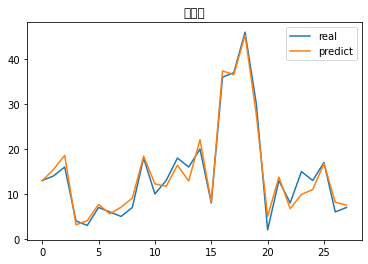

In [53]:
predict = pd.DataFrame(regr.predict(X_test_std))
predict.columns = ['predict']
real = pd.DataFrame(y_test.values)
real.columns = ['real']
df1 = pd.concat( [real, predict], axis=1 )
df1.plot(kind='line',title='折線圖',figsize=(6,4))

In [38]:
X_rnn = np.array(X_train).reshape(len(X_train), 6,1)                              #使用簡單RNN
y_rnn = np.array(y_train).reshape(len(y_train),1)
print(X_rnn.shape)
print(y_rnn.shape)


(63, 6, 1)
(63, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN


model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(6,1)))
model.add(Dense(256))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_rnn, y_rnn, epochs=1000, batch_size=5, verbose=2)

Epoch 1/1000
13/13 - 1s - loss: 426.5976
Epoch 2/1000
13/13 - 0s - loss: 280.1202
Epoch 3/1000
13/13 - 0s - loss: 178.6197
Epoch 4/1000
13/13 - 0s - loss: 146.9309
Epoch 5/1000
13/13 - 0s - loss: 141.9458
Epoch 6/1000
13/13 - 0s - loss: 138.0859
Epoch 7/1000
13/13 - 0s - loss: 132.8336
Epoch 8/1000
13/13 - 0s - loss: 130.4374
Epoch 9/1000
13/13 - 0s - loss: 122.0543
Epoch 10/1000
13/13 - 0s - loss: 115.2052
Epoch 11/1000
13/13 - 0s - loss: 107.8940
Epoch 12/1000
13/13 - 0s - loss: 101.2492
Epoch 13/1000
13/13 - 0s - loss: 93.2418
Epoch 14/1000
13/13 - 0s - loss: 86.8369
Epoch 15/1000
13/13 - 0s - loss: 83.0639
Epoch 16/1000
13/13 - 0s - loss: 77.0846
Epoch 17/1000
13/13 - 0s - loss: 75.5710
Epoch 18/1000
13/13 - 0s - loss: 70.9276
Epoch 19/1000
13/13 - 0s - loss: 70.3566
Epoch 20/1000
13/13 - 0s - loss: 64.0199
Epoch 21/1000
13/13 - 0s - loss: 61.5786
Epoch 22/1000
13/13 - 0s - loss: 58.4871
Epoch 23/1000
13/13 - 0s - loss: 57.1986
Epoch 24/1000
13/13 - 0s - loss: 54.6977
Epoch 25/1000

Epoch 201/1000
13/13 - 0s - loss: 6.3611
Epoch 202/1000
13/13 - 0s - loss: 6.1322
Epoch 203/1000
13/13 - 0s - loss: 4.8016
Epoch 204/1000
13/13 - 0s - loss: 5.4858
Epoch 205/1000
13/13 - 0s - loss: 5.4317
Epoch 206/1000
13/13 - 0s - loss: 5.9323
Epoch 207/1000
13/13 - 0s - loss: 5.4937
Epoch 208/1000
13/13 - 0s - loss: 5.1304
Epoch 209/1000
13/13 - 0s - loss: 5.6591
Epoch 210/1000
13/13 - 0s - loss: 5.3527
Epoch 211/1000
13/13 - 0s - loss: 6.1242
Epoch 212/1000
13/13 - 0s - loss: 5.2404
Epoch 213/1000
13/13 - 0s - loss: 7.4113
Epoch 214/1000
13/13 - 0s - loss: 6.0331
Epoch 215/1000
13/13 - 0s - loss: 6.3616
Epoch 216/1000
13/13 - 0s - loss: 5.4651
Epoch 217/1000
13/13 - 0s - loss: 4.9376
Epoch 218/1000
13/13 - 0s - loss: 4.7368
Epoch 219/1000
13/13 - 0s - loss: 4.7220
Epoch 220/1000
13/13 - 0s - loss: 4.8527
Epoch 221/1000
13/13 - 0s - loss: 5.1052
Epoch 222/1000
13/13 - 0s - loss: 5.9389
Epoch 223/1000
13/13 - 0s - loss: 5.9388
Epoch 224/1000
13/13 - 0s - loss: 7.1105
Epoch 225/1000
1

Epoch 401/1000
13/13 - 0s - loss: 4.9318
Epoch 402/1000
13/13 - 0s - loss: 4.3276
Epoch 403/1000
13/13 - 0s - loss: 4.6834
Epoch 404/1000
13/13 - 0s - loss: 4.2729
Epoch 405/1000
13/13 - 0s - loss: 4.3019
Epoch 406/1000
13/13 - 0s - loss: 5.2299
Epoch 407/1000
13/13 - 0s - loss: 4.3882
Epoch 408/1000
13/13 - 0s - loss: 7.5483
Epoch 409/1000
13/13 - 0s - loss: 5.0931
Epoch 410/1000
13/13 - 0s - loss: 4.6769
Epoch 411/1000
13/13 - 0s - loss: 4.9296
Epoch 412/1000
13/13 - 0s - loss: 5.4563
Epoch 413/1000
13/13 - 0s - loss: 4.6261
Epoch 414/1000
13/13 - 0s - loss: 4.6525
Epoch 415/1000
13/13 - 0s - loss: 4.3853
Epoch 416/1000
13/13 - 0s - loss: 4.5377
Epoch 417/1000
13/13 - 0s - loss: 4.3297
Epoch 418/1000
13/13 - 0s - loss: 3.7761
Epoch 419/1000
13/13 - 0s - loss: 6.4185
Epoch 420/1000
13/13 - 0s - loss: 5.8764
Epoch 421/1000
13/13 - 0s - loss: 4.6045
Epoch 422/1000
13/13 - 0s - loss: 6.0379
Epoch 423/1000
13/13 - 0s - loss: 4.9556
Epoch 424/1000
13/13 - 0s - loss: 4.2966
Epoch 425/1000
1

Epoch 601/1000
13/13 - 0s - loss: 5.3657
Epoch 602/1000
13/13 - 0s - loss: 3.8001
Epoch 603/1000
13/13 - 0s - loss: 4.3401
Epoch 604/1000
13/13 - 0s - loss: 4.2581
Epoch 605/1000
13/13 - 0s - loss: 4.6929
Epoch 606/1000
13/13 - 0s - loss: 4.2830
Epoch 607/1000
13/13 - 0s - loss: 4.3755
Epoch 608/1000
13/13 - 0s - loss: 3.5831
Epoch 609/1000
13/13 - 0s - loss: 3.7580
Epoch 610/1000
13/13 - 0s - loss: 3.8446
Epoch 611/1000
13/13 - 0s - loss: 3.7445
Epoch 612/1000
13/13 - 0s - loss: 3.6179
Epoch 613/1000
13/13 - 0s - loss: 3.8241
Epoch 614/1000
13/13 - 0s - loss: 3.6527
Epoch 615/1000
13/13 - 0s - loss: 4.4775
Epoch 616/1000
13/13 - 0s - loss: 3.4790
Epoch 617/1000
13/13 - 0s - loss: 3.7203
Epoch 618/1000
13/13 - 0s - loss: 4.0723
Epoch 619/1000
13/13 - 0s - loss: 4.3635
Epoch 620/1000
13/13 - 0s - loss: 5.4626
Epoch 621/1000
13/13 - 0s - loss: 4.5115
Epoch 622/1000
13/13 - 0s - loss: 5.7345
Epoch 623/1000
13/13 - 0s - loss: 4.6624
Epoch 624/1000
13/13 - 0s - loss: 4.1910
Epoch 625/1000
1

Epoch 801/1000
13/13 - 0s - loss: 6.2452
Epoch 802/1000
13/13 - 0s - loss: 3.4762
Epoch 803/1000
13/13 - 0s - loss: 4.1385
Epoch 804/1000
13/13 - 0s - loss: 3.2252
Epoch 805/1000
13/13 - 0s - loss: 4.0014
Epoch 806/1000
13/13 - 0s - loss: 3.7786
Epoch 807/1000
13/13 - 0s - loss: 3.4418
Epoch 808/1000
13/13 - 0s - loss: 3.2033
Epoch 809/1000
13/13 - 0s - loss: 3.2074
Epoch 810/1000
13/13 - 0s - loss: 3.4318
Epoch 811/1000
13/13 - 0s - loss: 3.3381
Epoch 812/1000
13/13 - 0s - loss: 3.6531
Epoch 813/1000
13/13 - 0s - loss: 3.2200
Epoch 814/1000
13/13 - 0s - loss: 3.4839
Epoch 815/1000
13/13 - 0s - loss: 4.0130
Epoch 816/1000
13/13 - 0s - loss: 3.2485
Epoch 817/1000
13/13 - 0s - loss: 3.1027
Epoch 818/1000
13/13 - 0s - loss: 3.5269
Epoch 819/1000
13/13 - 0s - loss: 2.9765
Epoch 820/1000
13/13 - 0s - loss: 3.1083
Epoch 821/1000
13/13 - 0s - loss: 3.7155
Epoch 822/1000
13/13 - 0s - loss: 3.3216
Epoch 823/1000
13/13 - 0s - loss: 3.9487
Epoch 824/1000
13/13 - 0s - loss: 3.2592
Epoch 825/1000
1

In [41]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)
y_pred_rnn.shape

(63,)

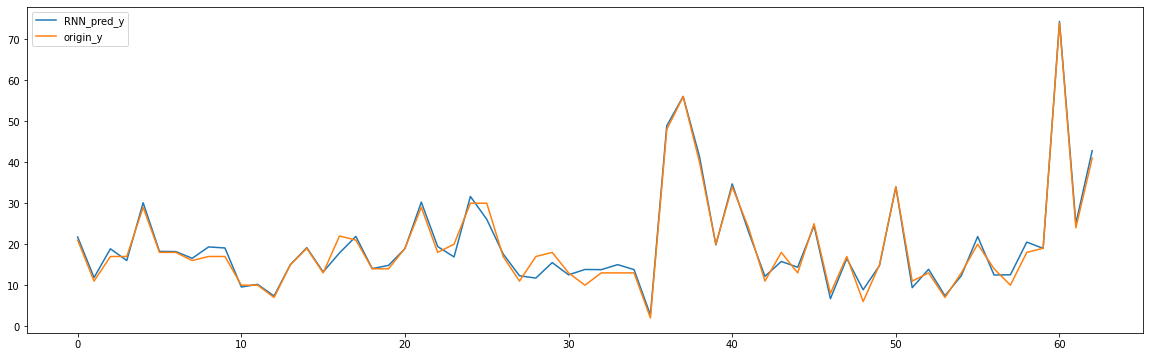

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(y_train.index, y_pred_rnn, label='RNN_pred_y')
plt.plot(y_train.index, y_train, label='origin_y')
plt.legend()

In [43]:
X_rnn_test = np.array(X_test).reshape(len(X_test), 6,1) 
y_pred_rnn_test = model.predict(X_rnn_test).reshape(-1)

print('MSE = ', metrics.mean_squared_error(y_test.values, y_pred_rnn_test))

MSE =  33.00130958608114


<AxesSubplot:title={'center':'折線圖'}>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22294 missing from curre

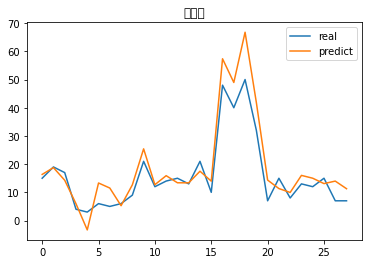

In [44]:
y_pred_rnn 
predict = pd.DataFrame(y_pred_rnn_test)
predict.columns = ['predict']
real = pd.DataFrame(y_test.values)
real.columns = ['real']
df1 = pd.concat( [real, predict], axis=1 )
df1.plot(kind='line',title='折線圖',figsize=(6,4))